In [1]:
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer, util
import torch

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
2024-09-24 13:20:22.196961: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-24 13:20:23.993431: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 13:20:26.803865: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning

In [2]:
with open('data1.pkl', 'rb') as file:
    data = pickle.load(file)

data[:10]

[['헐! 나 이벤트에 당첨 됐어.', '5'],
 ['내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.', '5'],
 ['한 명 뽑는 거였는데, 그게 바로 내가 된 거야.', '5'],
 ['당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. 그래서 못 산 향수야.', '5'],
 ['에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.', '4'],
 ['난 부페 형식의 음식들도 정말 좋아해. 그 것도 좀 알려 줘.', '4'],
 ['응. 완전히 끝난 거야. 한 달 동안 주말에 쉬지도 못하고 일만 했거든.', '5'],
 ['신나는 음악 듣는 것도 좋고, 어디 여행 가고 싶고 이 것 저 것 다 해보고 싶어.', '5'],
 ['친구들도 내 연락 기다리고 있을 텐데 내가 까먹고 있었네?', '5'],
 ['그래. 일단은 친구들부터 만나서 여행 계획에 대해서 얘기 좀 해봐야 되겠어.', '5']]

In [15]:
texts  = []
labels = []

for lst in data:
    texts.append(lst[0])
    labels.append(lst[1])

print(texts[:10])
print(labels[:10])

['헐! 나 이벤트에 당첨 됐어.', '내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.', '한 명 뽑는 거였는데, 그게 바로 내가 된 거야.', '당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. 그래서 못 산 향수야.', '에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.', '난 부페 형식의 음식들도 정말 좋아해. 그 것도 좀 알려 줘.', '응. 완전히 끝난 거야. 한 달 동안 주말에 쉬지도 못하고 일만 했거든.', '신나는 음악 듣는 것도 좋고, 어디 여행 가고 싶고 이 것 저 것 다 해보고 싶어.', '친구들도 내 연락 기다리고 있을 텐데 내가 까먹고 있었네?', '그래. 일단은 친구들부터 만나서 여행 계획에 대해서 얘기 좀 해봐야 되겠어.']
['5', '5', '5', '5', '4', '4', '5', '5', '5', '5']


In [8]:
model = SentenceTransformer('snunlp/KR-SBERT-Medium-extended-klueNLItriplet_PARpair_QApair-klueSTS')
model = model.to('cuda')

In [11]:
embeddings = model.encode(texts, convert_to_numpy=True)

embeddings.shape

(19374, 768)

In [17]:
embeddings[:10]

array([[-0.89839387,  0.57909226,  0.56681854, ..., -0.5184131 ,
        -0.32211968, -0.7917102 ],
       [-0.64746433,  0.17240538, -0.42468885, ..., -1.1444621 ,
        -0.6896973 , -0.3572315 ],
       [-1.2735804 ,  1.6038597 , -0.58989733, ...,  0.25950494,
         0.12824495,  0.2809873 ],
       ...,
       [-1.831748  ,  0.56139886, -1.2549391 , ..., -0.72535324,
         0.00974401, -1.1049888 ],
       [ 0.36165258, -0.45623016, -0.3084835 , ..., -0.8944107 ,
         0.7268161 , -0.0543461 ],
       [ 0.25374666,  0.7325255 ,  0.46578622, ..., -0.91866094,
         0.6016482 ,  0.9472817 ]], dtype=float32)

In [28]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

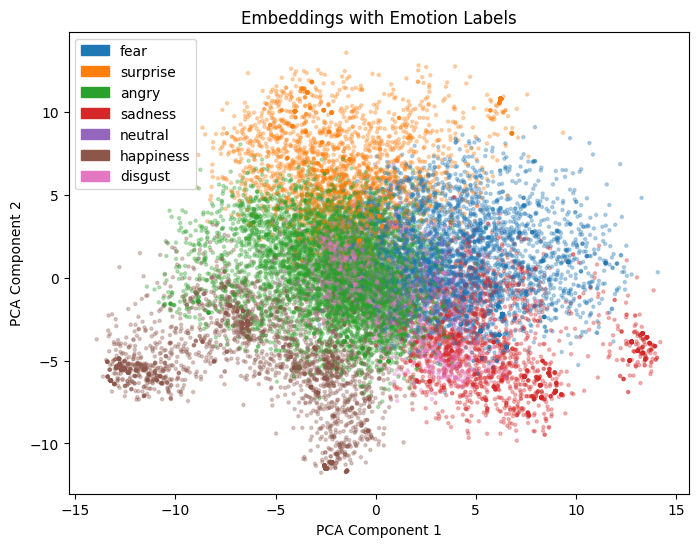

In [33]:
# 감정 레이블에 해당하는 색상 설정
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']

# 감정 레이블
emotions = ['fear', 'surprise', 'angry', 'sadness', 'neutral', 'happiness', 'disgust']

# KMeans 클러스터링 (7개의 클러스터)
kmeans = KMeans(n_clusters=7, random_state=42)
labels = kmeans.fit_predict(embeddings)

# PCA로 2차원으로 차원 축소
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# 시각화
plt.figure(figsize=(8, 6))
cmap = ListedColormap(colors)  # 색상 7개만 설정
scatter = plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=labels, cmap=cmap, alpha=0.3, s=5)

# 범례 생성
patches = [mpatches.Patch(color=color, label=emotion) for color, emotion in zip(colors, emotions)]
plt.legend(handles=patches)

plt.title("Embeddings with Emotion Labels")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()